## Import libraries

In [1]:
from skimage import io
from skimage.util import random_noise
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os, h5py

## Retrieve dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # many data set are included in keras

x_data = np.concatenate([x_train, x_test], axis=0)
y_data = np.concatenate([y_train, y_test])

# Normalize the data
x_data = x_data.astype('float32') / 255.

# Reshape the data (28,28) -> (28,28,1)
x_data = np.expand_dims(x_data, axis=-1)


# Final shape of data
print('x shape :', x_data.shape)
print('y shape :', y_data.shape)

x shape : (70000, 28, 28, 1)
y shape : (70000,)


## Creation of new dataset

In [3]:
# Creation of noisy image

def noise_it(data):
    new_data = np.copy(data)
    for i,image in enumerate(new_data):
        image=random_noise(image, mode='gaussian', mean=0, var=0.3)
        image=random_noise(image, mode='s&p',      amount=0.2, salt_vs_pepper=0.5)
        image=random_noise(image, mode='poisson') 
        image=random_noise(image, mode='speckle',  mean=0, var=0.1)
        new_data[i]=image
    print('Done.')
    return new_data

# ---- Add noise to input data : x_data
#
noisy_data = noise_it(x_data)


Done.


In [4]:
print('Clean dataset (clean_data) : ',x_data.shape)
print('Noisy dataset (noisy_data) : ',noisy_data.shape)



Clean dataset (clean_data) :  (70000, 28, 28, 1)
Noisy dataset (noisy_data) :  (70000, 28, 28, 1)


Clean Data


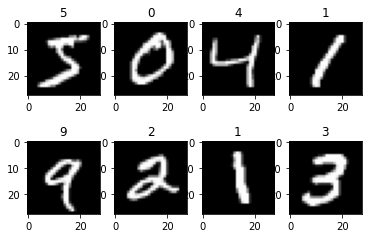

In [5]:
print("Clean Data")
for i in range(8):
    # define subplot
    plt.subplot(240 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_data[i], cmap='gray')
    plt.title(y_data[i])
# show the figure
plt.show()

Noisy Data


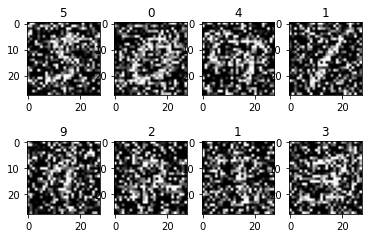

In [6]:
print("Noisy Data")
for i in range(8):
    # define subplot
    plt.subplot(240 + 1 + i)
    # plot raw pixel data
    plt.imshow(noisy_data[i], cmap='gray')
    plt.title(y_data[i])
# show the figure
plt.show()

In [7]:
# Shuffle dataset

p = np.random.permutation(len(x_data))
x_data, noisy_data, y_data = x_data[p], noisy_data[p], y_data[p]
print('Shuffled.')

Shuffled.


In [8]:
def save_prepared_dataset(clean_data, noisy_data, class_data, filename):

    path=os.path.dirname(filename)
    os.makedirs(path, mode=0o750, exist_ok=True)

    with h5py.File(filename, "w") as f:
        f.create_dataset("clean_data", data=clean_data)
        f.create_dataset("noisy_data", data=noisy_data)
        f.create_dataset("class_data", data=class_data)
    print('Saved.')
    print('clean_data shape is : ',clean_data.shape)
    print('noisy_data shape is : ',noisy_data.shape)
    print('class_data shape is : ',class_data.shape)


In [9]:
prepared_dataset   = './data/mnist-noisy.h5'

save_prepared_dataset(x_data, noisy_data, y_data, filename=prepared_dataset)

Saved.
clean_data shape is :  (70000, 28, 28, 1)
noisy_data shape is :  (70000, 28, 28, 1)
class_data shape is :  (70000,)
